In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
#Load hand digit dataset from Keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [17]:
#See the size of the data set
print("x_train", len(x_train))
print("x_test" ,len(x_test))
print("y_train" ,len(y_train))
print("y_test" ,len(y_test))

x_train 60000
x_test 10000
y_train 60000
y_test 10000


In [8]:
#See how the array looks like
print(x_train[0].shape)
x_train[0]

(28, 28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

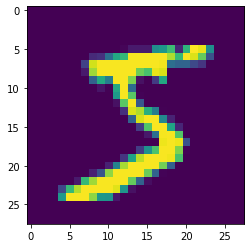

In [9]:
#This is a first trainning image
plt.imshow(x_train[0])

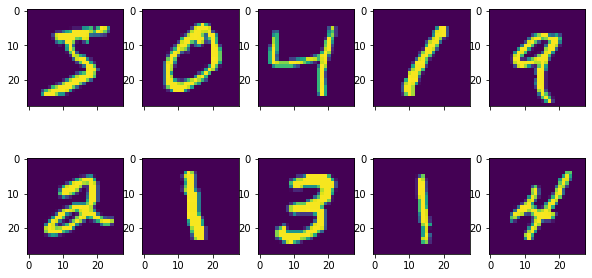

In [16]:
fig, ax = plt.subplots(2,5, sharex = True, figsize= (10,5))
for i, col in enumerate(range(0,10)):
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])

In [21]:
#each image
print("each image",x_train.shape)
#flaten arrays
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)

each image (60000, 28, 28)


In [22]:
x_train_flatten[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [24]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,),activation = "sigmoid") #10 output 784 input 
])

model.compile(optimizer = 'adam',
              loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy']
             ) #optimizer allow you to train efficiently when we have back propaganda

model.fit(x_train_flatten, y_train, epochs = 5)

Epoch 1/5


2023-05-13 20:21:21.520515: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1875/1875 [==============================] - 1s 526us/step - loss: 9.7725 - accuracy: 0.8398
Epoch 2/5
1875/1875 [==============================] - 1s 529us/step - loss: 6.1434 - accuracy: 0.8783
Epoch 3/5
1875/1875 [==============================] - 1s 601us/step - loss: 5.7463 - accuracy: 0.8825
Epoch 4/5
1875/1875 [==============================] - 1s 606us/step - loss: 5.4978 - accuracy: 0.8858
Epoch 5/5
1875/1875 [==============================] - 1s 543us/step - loss: 5.3703 - accuracy: 0.8873


In [25]:
#improve accuracy by reduce the scale of picture
X_train = x_train / 255
X_test = x_test / 255
X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_test_flatten = X_test.reshape(len(X_test), 28*28)

In [26]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,),activation = "sigmoid") #10 output 784 input 
])

model.compile(optimizer = 'adam',
              loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy']
             ) #optimizer allow you to train efficiently when we have back propaganda

model.fit(X_train_flatten, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 1s 543us/step - loss: 0.4695 - accuracy: 0.8771
Epoch 2/5
1875/1875 [==============================] - 1s 532us/step - loss: 0.3034 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 1s 528us/step - loss: 0.2828 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 1s 529us/step - loss: 0.2734 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 1s 531us/step - loss: 0.2663 - accuracy: 0.9258


In [29]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 0s 455us/step - loss: 0.2684 - accuracy: 0.9250


[0.2684215307235718, 0.925000011920929]

In [35]:
y_predicted = model.predict(X_test_flatten)
y_predicted[0]

313/313 [==============================] - 0s 374us/step


array([2.1397766e-02, 4.5840667e-07, 5.6207374e-02, 9.6221566e-01,
       2.2130243e-03, 1.2466217e-01, 1.7688195e-06, 9.9977148e-01,
       8.4086232e-02, 6.5165502e-01], dtype=float32)

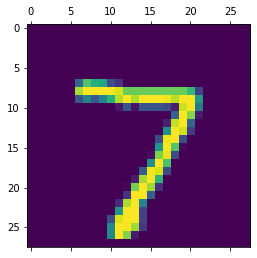

In [38]:
plt.matshow(x_test[0])

In [37]:
np.argmax(y_predicted[0])

7

2

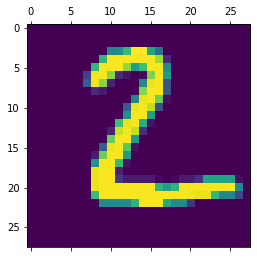

In [40]:
y_predicted[1]
plt.matshow(x_test[1])
np.argmax(y_predicted[1])

In [43]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [45]:
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1113,    4,    1,    0,    1,    4,    2,   10,    0],
       [   6,    8,  938,   13,    7,    3,   11,   10,   32,    4],
       [   4,    0,   24,  915,    0,   27,    2,   11,   20,    7],
       [   2,    1,    9,    1,  902,    0,    9,    4,    9,   45],
       [  10,    3,    4,   29,    7,  784,   16,    6,   26,    7],
       [  14,    3,    9,    1,    7,   12,  909,    2,    1,    0],
       [   1,    9,   23,    7,    7,    1,    0,  943,    2,   35],
       [   9,    7,    9,   24,    9,   32,    8,   12,  856,    8],
       [  11,    7,    1,   11,   19,    6,    0,   22,    6,  926]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

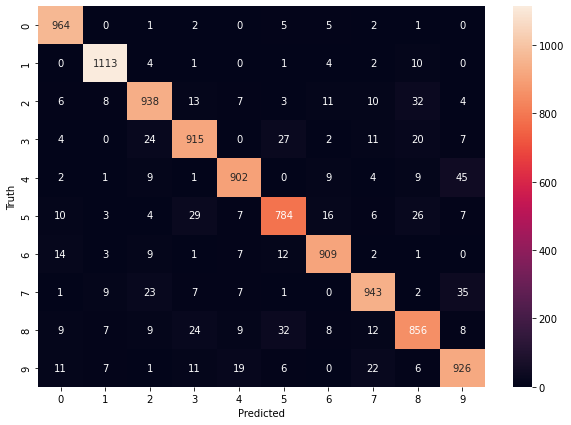

In [46]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix, annot= True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel("Truth")

In [47]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,),activation = "relu"),
    keras.layers.Dense(10,activation = "sigmoid") #Hidden layers
])

model.compile(optimizer = 'adam',
              loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy']
             ) #optimizer allow you to train efficiently when we have back propaganda

model.fit(X_train_flatten, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 784us/step - loss: 0.2644 - accuracy: 0.9249
Epoch 2/5
1875/1875 [==============================] - 2s 899us/step - loss: 0.1205 - accuracy: 0.9647
Epoch 3/5
1875/1875 [==============================] - 2s 891us/step - loss: 0.0843 - accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 2s 885us/step - loss: 0.0661 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 2s 846us/step - loss: 0.0517 - accuracy: 0.9843


In [50]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 0s 566us/step - loss: 0.0774 - accuracy: 0.9751


[0.07735621184110641, 0.9750999808311462]